In [30]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [31]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [32]:
# Create a practice set of random latitude and longitude combinations
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [33]:
# Use the tuple() function to display the latitude and longitude combinations
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [34]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [35]:
# Use the citipy module to determine city based on latitude and longitude
from citipy import citipy

In [36]:
# Use the tuple() function to display the latitude and longitude combinations
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

castro cl
sorvag fo
punta arenas cl
puerto ayora ec
khatanga ru
havoysund no
albany au
hermanus za
pevek ru
busselton au
san patricio mx
avera pf
hobart au
atuona pf
khatanga ru
karratha au
trairi br
lebu cl
rikitea pf
jamestown sh
hobart au
fraga es
mar del plata ar
esperance au
mar del plata ar
punta arenas cl
pevek ru
punta arenas cl
puerto ayora ec
ushuaia ar
butaritari ki
bubaque gw
bose cn
polovinnoye ru
carnarvon au
khatanga ru
taolanaro mg
petropavlovsk-kamchatskiy ru
albany au
belushya guba ru
cape town za
palmas br
nouadhibou mr
vao nc
riyadh sa
burnie au
rikitea pf
tuatapere nz
la tuque ca
torbay ca
rikitea pf
deputatskiy ru
ushuaia ar
senj hr
bilibino ru
honningsvag no
ikalamavony mg
angoche mz
tuatapere nz
pochutla mx
mataura pf
kasongo cd
castro cl
tuy hoa vn
verkhnyaya inta ru
atuona pf
san cristobal ec
rock sound bs
bredasdorp za
ushuaia ar
puerto ayora ec
nanhai cn
sentyabrskiy ru
jiazi cn
tiksi ru
batemans bay au
hilo us
saint george bm
ye mm
jamestown sh
hithadhoo mv

cape town za
berlevag no
valparaiso cl
paramonga pe
mar del plata ar
butaritari ki
barrow us
puerto escondido mx
albany au
provideniya ru
husavik is
ushuaia ar
eyl so
piacabucu br
hammerfest no
amderma ru
mareeba au
vaini to
talawdi sd
celestun mx
port alfred za
qaanaaq gl
kapaa us
mar del plata ar
hailar cn
ereymentau kz
svetlyy ru
rikitea pf
lagoa pt
ilulissat gl
mar del plata ar
norman wells ca
port stanley ca
kavaratti in
fortuna us
severo-kurilsk ru
victoria sc
kitimat ca
ponta do sol cv
longlac ca
grand river south east mu
dikson ru
mataura pf
punta arenas cl
clyde river ca
hue vn
souillac mu
doctor pedro p. pena py
nikolskoye ru
atuona pf
provideniya ru
butaritari ki
new norfolk au
rikitea pf
ambovombe mg
cherskiy ru
rikitea pf
puerto ayora ec
tuggurt dz
yarada in
paamiut gl
warqla dz
ushuaia ar
subtanjalla pe
yellowknife ca
avarua ck
grand river south east mu
verkhoyansk ru
kysyl-syr ru
omura jp
katangli ru
ushuaia ar
dikson ru
chuy uy
tefe br
ishigaki jp
kinston us
praia da vi

mar del plata ar
camana pe
guerrero negro mx
tessalit ml
klaksvik fo
airai pw
tumannyy ru
longyearbyen sj
qaanaaq gl


In [37]:
# Create a list for holding the cities
cities = []

# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

In [38]:
# Import the requests library
import requests

# Import the API key
from config import weather_api_key

In [39]:
# Build the basic URL for the OpenWeatherMap with your weather_api_key added to the URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [40]:
# Import the datetime module from the datetime library
from datetime import datetime

In [41]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | castro
Processing Record 2 of Set 1 | sorvag
City not found. Skipping...
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | khatanga
Processing Record 6 of Set 1 | havoysund
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | pevek
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | san patricio
Processing Record 12 of Set 1 | avera
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | karratha
Processing Record 16 of Set 1 | trairi
Processing Record 17 of Set 1 | lebu
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | fraga
Processing Record 21 of Set 1 | mar del plata
Processing Record 22 of Set 1 | esperance
Processing Record 23 of 

Processing Record 39 of Set 4 | victoria
Processing Record 40 of Set 4 | grindavik
Processing Record 41 of Set 4 | iqaluit
Processing Record 42 of Set 4 | catuday
Processing Record 43 of Set 4 | caohe
Processing Record 44 of Set 4 | buraydah
Processing Record 45 of Set 4 | druskininkai
Processing Record 46 of Set 4 | chuy
Processing Record 47 of Set 4 | mayor pablo lagerenza
Processing Record 48 of Set 4 | buala
Processing Record 49 of Set 4 | katobu
Processing Record 50 of Set 4 | abu dhabi
Processing Record 1 of Set 5 | maniitsoq
Processing Record 2 of Set 5 | sandwick
Processing Record 3 of Set 5 | surt
Processing Record 4 of Set 5 | buarcos
Processing Record 5 of Set 5 | puerto real
Processing Record 6 of Set 5 | areosa
Processing Record 7 of Set 5 | houma
Processing Record 8 of Set 5 | nikolskoye
Processing Record 9 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 10 of Set 5 | minab
Processing Record 11 of Set 5 | garowe
Processing Record 12 of Set 5 | vila franc

Processing Record 31 of Set 8 | doctor pedro p. pena
City not found. Skipping...
Processing Record 32 of Set 8 | ambovombe
Processing Record 33 of Set 8 | tuggurt
City not found. Skipping...
Processing Record 34 of Set 8 | yarada
Processing Record 35 of Set 8 | paamiut
Processing Record 36 of Set 8 | warqla
City not found. Skipping...
Processing Record 37 of Set 8 | subtanjalla
Processing Record 38 of Set 8 | kysyl-syr
Processing Record 39 of Set 8 | omura
Processing Record 40 of Set 8 | katangli
Processing Record 41 of Set 8 | tefe
Processing Record 42 of Set 8 | ishigaki
Processing Record 43 of Set 8 | kinston
Processing Record 44 of Set 8 | campos
Processing Record 45 of Set 8 | moindou
Processing Record 46 of Set 8 | mehamn
Processing Record 47 of Set 8 | goderich
Processing Record 48 of Set 8 | berdigestyakh
Processing Record 49 of Set 8 | manacapuru
Processing Record 50 of Set 8 | coihaique
Processing Record 1 of Set 9 | viedma
Processing Record 2 of Set 9 | flensburg
Processing 

City not found. Skipping...
Processing Record 18 of Set 12 | canto do buriti
Processing Record 19 of Set 12 | bilma
Processing Record 20 of Set 12 | muravlenko
Processing Record 21 of Set 12 | chapais
Processing Record 22 of Set 12 | urgut
Processing Record 23 of Set 12 | mapiri
Processing Record 24 of Set 12 | paka
Processing Record 25 of Set 12 | kindersley
Processing Record 26 of Set 12 | lugovskiy
City not found. Skipping...
Processing Record 27 of Set 12 | marrakesh
Processing Record 28 of Set 12 | port shepstone
Processing Record 29 of Set 12 | teahupoo
Processing Record 30 of Set 12 | jardanhaza
Processing Record 31 of Set 12 | north bend
Processing Record 32 of Set 12 | itaituba
Processing Record 33 of Set 12 | joshimath
Processing Record 34 of Set 12 | buariki
City not found. Skipping...
Processing Record 35 of Set 12 | khorixas
Processing Record 36 of Set 12 | bodoco
City not found. Skipping...
Processing Record 37 of Set 12 | bermeo
Processing Record 38 of Set 12 | ruatoria


In [42]:
len(city_data)

574

In [43]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Castro,-24.79,-50.01,66.78,40,28,5.55,BR,2020-07-10 15:59:17
1,Punta Arenas,-53.15,-70.92,32.00,83,75,11.41,CL,2020-07-10 16:00:47
2,Puerto Ayora,-0.74,-90.35,70.00,90,99,5.01,EC,2020-07-10 16:02:53
3,Khatanga,71.97,102.50,54.52,78,100,16.87,RU,2020-07-10 16:02:53
4,Havoysund,71.00,24.66,46.40,87,75,20.80,NO,2020-07-10 16:02:53
5,Albany,42.60,-73.97,84.00,63,99,7.02,US,2020-07-10 16:02:40
6,Hermanus,-34.42,19.23,55.99,67,98,1.01,ZA,2020-07-10 16:02:54
7,Pevek,69.70,170.31,42.96,99,100,6.04,RU,2020-07-10 16:02:54
8,Busselton,-33.65,115.33,39.99,72,0,10.36,AU,2020-07-10 16:02:54
9,San Patricio,19.22,-104.70,84.20,74,75,1.19,MX,2020-07-10 16:02:54


In [44]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [45]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Castro,BR,2020-07-10 15:59:17,-24.79,-50.01,66.78,40,28,5.55
1,Punta Arenas,CL,2020-07-10 16:00:47,-53.15,-70.92,32.00,83,75,11.41
2,Puerto Ayora,EC,2020-07-10 16:02:53,-0.74,-90.35,70.00,90,99,5.01
3,Khatanga,RU,2020-07-10 16:02:53,71.97,102.50,54.52,78,100,16.87
4,Havoysund,NO,2020-07-10 16:02:53,71.00,24.66,46.40,87,75,20.80
...,...,...,...,...,...,...,...,...,...
569,Rocha,UY,2020-07-10 16:06:20,-34.48,-54.33,54.68,68,100,12.73
570,Soe,ID,2020-07-10 16:06:21,-9.86,124.28,63.23,100,39,4.83
571,Kirakira,SB,2020-07-10 16:06:21,-10.45,161.92,78.44,84,59,10.22
572,Camana,PE,2020-07-10 16:06:21,-16.62,-72.71,64.98,63,31,9.46


In [46]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [47]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [48]:
# Import the time module
import time

# Get today's date in seconds.
today = time.time()
today = time.strftime("%x")
today

'07/10/20'

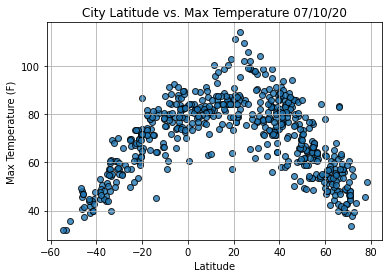

In [49]:
# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

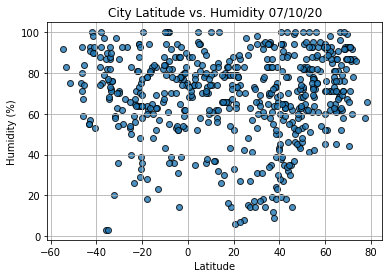

In [50]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

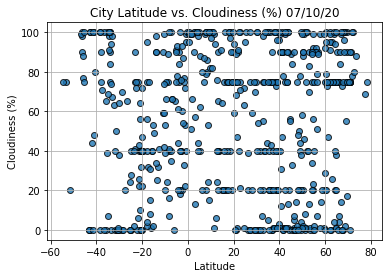

In [51]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

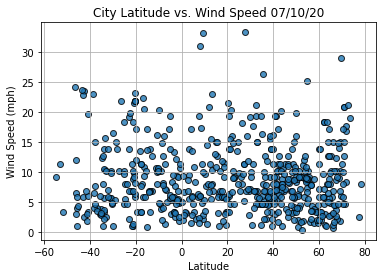

In [52]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()

In [75]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [76]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [77]:
index13 = city_data_df.loc[13]
index13

City                     Karratha
Country                        AU
Date          2020-07-10 16:02:55
Lat                        -20.74
Lng                        116.85
Max Temp                    69.57
Humidity                       29
Cloudiness                      0
Wind Speed                   9.95
Name: 13, dtype: object

In [78]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3       True
4       True
       ...  
569    False
570    False
571    False
572    False
573     True
Name: Lat, Length: 574, dtype: bool

In [79]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Castro,BR,2020-07-10 15:59:17,-24.79,-50.01,66.78,40,28,5.55
1,Punta Arenas,CL,2020-07-10 16:00:47,-53.15,-70.92,32.00,83,75,11.41
2,Puerto Ayora,EC,2020-07-10 16:02:53,-0.74,-90.35,70.00,90,99,5.01
3,Khatanga,RU,2020-07-10 16:02:53,71.97,102.50,54.52,78,100,16.87
4,Havoysund,NO,2020-07-10 16:02:53,71.00,24.66,46.40,87,75,20.80


In [81]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [91]:
northern_hemi_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,40.213308,10.154667,72.234128,68.261538,56.564103,8.623615
std,20.188730,86.273121,15.647088,21.644553,37.170070,5.553154
min,0.350000,-179.170000,33.800000,6.000000,0.000000,0.400000
25%,22.882500,-70.590000,60.152500,58.000000,20.000000,4.700000
50%,41.620000,19.580000,75.590000,71.000000,75.000000,7.445000
75%,56.352500,78.575000,84.200000,84.750000,90.000000,11.382500
max,78.220000,179.320000,114.060000,100.000000,100.000000,33.330000


In [93]:
southern_hemi_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000
mean,-21.297065,30.844293,65.707283,70.195652,51.913043,9.065435
std,13.950500,96.339118,14.495686,19.933901,34.186935,5.903203
min,-54.800000,-175.200000,32.000000,3.000000,0.000000,0.960000
25%,-33.605000,-56.375000,55.000000,59.000000,22.000000,4.700000
50%,-20.390000,25.760000,68.090000,74.000000,53.000000,7.495000
75%,-8.782500,128.882500,78.050000,84.000000,78.500000,11.990000
max,-0.600000,178.300000,92.660000,100.000000,100.000000,24.140000


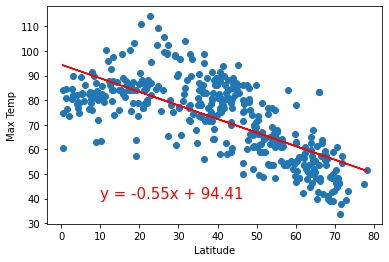

In [85]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]


# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Maximum Temperature', 'Max Temp',(10,40))

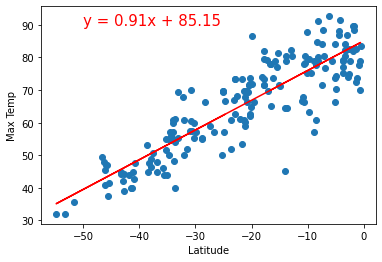

In [86]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Maximum Temperature', 'Max Temp',(-50,90))

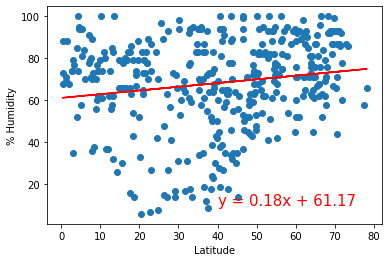

In [87]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

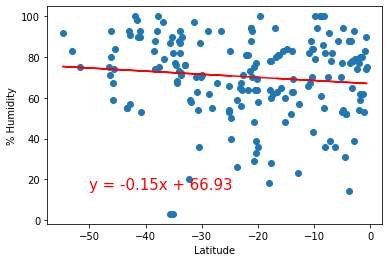

In [89]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

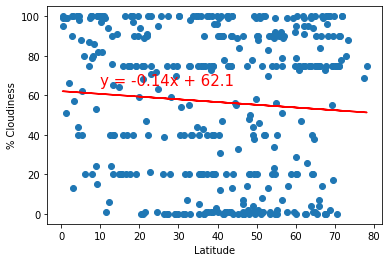

In [101]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,65))

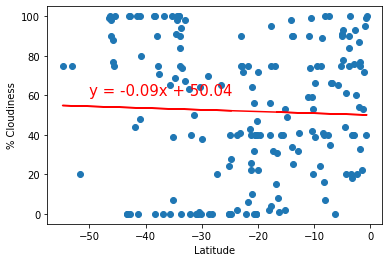

In [94]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

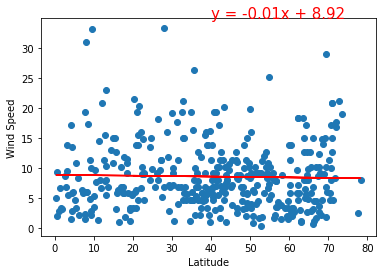

In [103]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

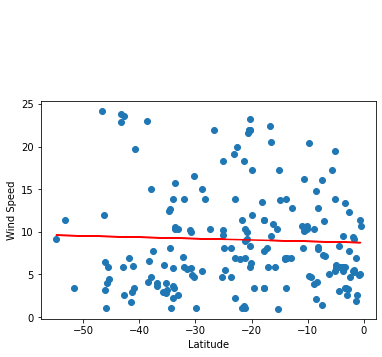

In [106]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))